# A Hidden Markov Model (HMM) for predicting Bitcoin prices using Python

## Introduction

In the context of economics mathematics, the Hidden Markov Model (HMM) has been widely utilized to forecast economic regimes and stock prices. In this study, we look at a new HMM approach to stock price prediction. In this work, we show how to measure the HMM's performance with different numbers of states using the Akaike Information Criterion (AIC), the Hannan‚Äì Quinn Information Criterion (HQC), the Bayesian Information Criterion (BIC), and the Bozdogan Consistent Akaike Information Criterion (CAIC). After that, we'll show you how to use HMM to forecast stock prices and how to validate the model with a test set.

## Data collection


This involves collecting data for the study, which we performed by following the steps mentioned below : 

   1. Finding Bitcoin data sets that fit our study by searching via online datasets from various websites such as [finance.yahoo.com](https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch), [coinmarketcap.com](https://coinmarketcap.com/currencies/bitcoin/), [coingecko.com](https://www.coingecko.com/fr/pi√®ces/bitcoin), [gemini.com](https://www.gemini.com/prices/bitcoin), and [kaggle.com](https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd). Thousands of rows were used to determine the size of datasets. 
   2. Manually verifying that the columns in the dataset have all of the information necessary to make our research a success; our criterion was at least 5 columns. Finally, we choose a bitcoin dataset containing historical data of bitcoin exchanges recorded every hour interval from [gemini.com](https://www.gemini.com/prices/bitcoin) that fits our research problem well. There are 46390 rows in this dataset, with 7 columns: date, open, high, low, closing, volume BTC, and volume USD. Also, it has data records which start from 2017-01-01 00:00:00 to 2022-04-18 00:00:00 open, high, low, closing, volume BTC and volume USD for a particular hour.
   
   

## Research Question

  - How to build an HMM model using the three algorithms: Forward, backward, and Baum-Welch on BTC prices such as open, low, high, and closing?
  - How to select the best HMM model using AIC, BIC, HQC, and CAIC?
  - How will I predict the test values of BTC and validate the model on the same values? 

## Purpose of research

We apply the HMM for numerous independent variables in this study, such as the BTC open, low, high, and closing prices. To keep the model simple and practical with cyclical economic cycles, we limit the number of states in the HMM to six. The AIC, BIC, HQC, and CAIC are four metrics used to choose the best HMM model. We utilize the HMM to predict the BTC price after selecting the best model.



## Importing libraries

The following packages are required for this study.

In [ ]:
# First install package of hmmlearn
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
help('hmmlearn')

Help on package hmmlearn:

NAME
    hmmlearn

DESCRIPTION
    hmmlearn
    
    ``hmmlearn`` is a set of algorithms for learning and inference of
    Hidden Markov Models.

PACKAGE CONTENTS
    _hmmc
    _utils
    _version
    base
    hmm
    stats
    tests (package)
    utils

VERSION
    0.2.7

FILE
    /usr/local/lib/python3.7/dist-packages/hmmlearn/__init__.py




In [ ]:
## Load Packages
import warnings
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
import pandas as pd
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [ ]:
# Import data and transform data to time series
data = pd.read_csv('Data_BTC_hourly.csv',index_col='date',parse_dates=True) 
data.head()

open    high     low   close  Volume BTC    Volume USD
date                                                                         
2017-01-01 00:00:00  974.55  974.55  965.34  972.00   10.914243  10608.644283
2017-01-01 01:00:00  972.00  972.00  970.48  970.55    2.204392   2139.473112
2017-01-01 02:00:00  970.55  974.50  967.78  969.89   81.681602  79222.169294
2017-01-01 03:00:00  969.89  972.08  967.78  967.80    2.381414   2304.732209
2017-01-01 04:00:00  967.80  967.80  967.78  967.80    5.042356   4879.992050

In [ ]:
# Check if you have a missing value 
data.isnull ().any()

open          False
high          False
low           False
close         False
Volume BTC    False
Volume USD    False
dtype: bool

In [ ]:
#Dropping any missing values from data 
data.dropna(inplace=True)

In [ ]:
data.columns

Index(['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD'], dtype='object')

In [ ]:
# show the dataframe
print('Shape of data',data.shape)

Shape of data (46390, 6)


In [ ]:
data

open      high       low     close  Volume BTC  \
date                                                                      
2017-01-01 00:00:00    974.55    974.55    965.34    972.00   10.914243   
2017-01-01 01:00:00    972.00    972.00    970.48    970.55    2.204392   
2017-01-01 02:00:00    970.55    974.50    967.78    969.89   81.681602   
2017-01-01 03:00:00    969.89    972.08    967.78    967.80    2.381414   
2017-01-01 04:00:00    967.80    967.80    967.78    967.80    5.042356   
...                       ...       ...       ...       ...         ...   
2022-04-17 20:00:00  40378.75  40464.42  40269.08  40272.78   13.717485   
2022-04-17 21:00:00  40272.78  40289.72  40145.42  40214.81    8.438115   
2022-04-17 22:00:00  40214.81  40333.30  39962.41  39996.41   21.986547   
2022-04-17 23:00:00  39996.41  40001.55  39572.66  39694.59   59.810351   
2022-04-18 00:00:00  39694.59  39773.19  39597.36  39738.54   32.482845   

                       Volume USD  
date                               
2017-01-01 00:00:00  1.060864e+04  
2017-01-01 01:00:00  2.139473e+03  
2017-01-01 02:00:00  7.922217e+04  
2017-01-01 03:00:00  2.304732e+03  
2017-01-01 04:00:00  4.879992e+03  
...                           ...  
2022-04-17 20:00:00  5.524413e+05  
2022-04-17 21:00:00  3.393372e+05  
2022-04-17 22:00:00  8.793830e+05  
2022-04-17 23:00:00  2.374147e+06  
2022-04-18 00:00:00  1.290821e+06  

[46390 rows x 6 columns]

> We have in this database 46390 observations 6 variables are: ``Open``, ``High``, ``Low``, ``Close``, ``Volume BTC``, ``Volume USD``. And we do not have any missing value in our data.

## Exploratory data analysis

## Descriptive statistics of prices

Let‚Äôs print some statistics such as the mean, median, min, max and standard deviation values for the above feature (column).


In [ ]:
# Show summary statistics of data
print(data.describe())

               open          high           low         close    Volume BTC  \
count  46390.000000  46390.000000  46390.000000  46390.000000  46390.000000   
mean   16903.499974  16998.313439  16801.382050  16904.334556    153.537708   
std    17563.812176  17662.295827  17457.512083  17563.976946    277.228656   
min      760.380000    769.100000    752.000000    760.380000      0.000000   
25%     5915.785000   5958.445000   5875.845000   5916.475000     28.514585   
50%     8953.470000   9013.110000   8904.650000   8954.780000     68.522981   
75%    23200.207500  23312.070000  23008.570000  23208.915000    165.822592   
max    68636.960000  69000.000000  68477.940000  68636.960000   8526.751048   

         Volume USD  
count  4.639000e+04  
mean   1.782066e+06  
std    3.278530e+06  
min    0.000000e+00  
25%    2.569079e+05  
50%    7.562795e+05  
75%    2.011121e+06  
max    1.039629e+08  


> We can notice in the table above that bitcoin reached its all-time high at 68789.63\$ and its all-time low at 65.53\$ [source](https://coinmarketcap.com/currencies/bitcoin/).

**Note**: We notice that both variables USD and BTC volumes at a minimum of 0, this is due to [incidences](https://status.gemini.com/history) in the GEMINI platform that is not recorded some volumes!  
 ==> We solved this problem by replacing the zero values by the mean of each variable.

In [ ]:
#mean instate 0
data['Volume BTC'] = data['Volume BTC'].apply(lambda x:np.mean(data['Volume BTC'])  if x == 0 else x)
data['Volume USD'] = data['Volume USD'].apply(lambda x:np.mean(data['Volume USD'])  if x == 0 else x)
print(data.describe())

               open          high           low         close    Volume BTC  \
count  46390.000000  46390.000000  46390.000000  46390.000000  46390.000000   
mean   16903.499974  16998.313439  16801.382050  16904.334556    154.262536   
std    17563.812176  17662.295827  17457.512083  17563.976946    277.026915   
min      760.380000    769.100000    752.000000    760.380000      0.001579   
25%     5915.785000   5958.445000   5875.845000   5916.475000     29.042884   
50%     8953.470000   9013.110000   8904.650000   8954.780000     69.530103   
75%    23200.207500  23312.070000  23008.570000  23208.915000    165.822592   
max    68636.960000  69000.000000  68477.940000  68636.960000   8526.751048   

         Volume USD  
count  4.639000e+04  
mean   1.790478e+06  
std    3.276232e+06  
min    1.701075e+01  
25%    2.636202e+05  
50%    7.700819e+05  
75%    2.011121e+06  
max    1.039629e+08  


##  Analyzing hourly prices
### Visualization of time series

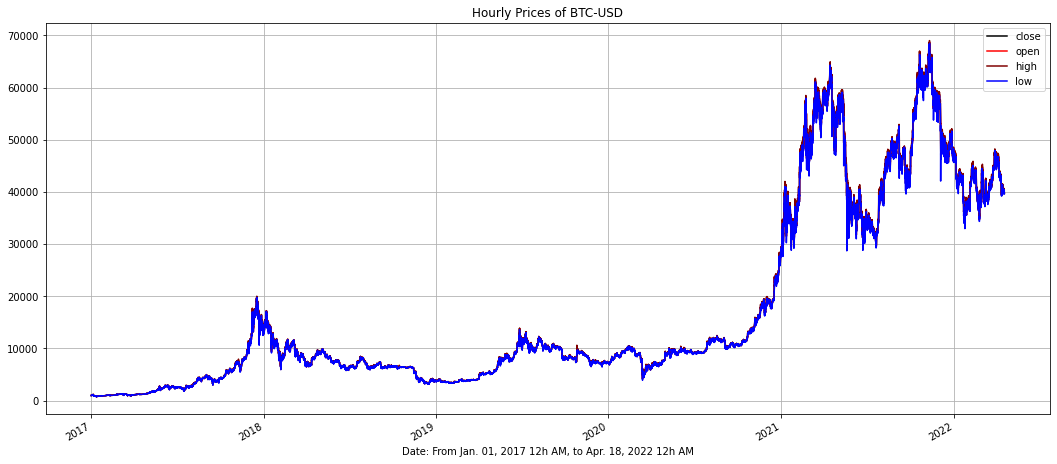

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
data['close'].plot(color='black',grid = True)
data['open'].plot(color='red',grid = True)
data['high'].plot(color='maroon',grid = True)
data['low'].plot(color='blue',grid = True)
plt.title('Hourly Prices of BTC-USD')
plt.xlabel('Date: From Jan. 01, 2017 12h AM, to Apr. 18, 2022 12h AM')
plt.legend()
plt.show()

> The figure above represents the series (Open, Close, High, Low). The first observations we can take from this series are the
following:
  ‚Ä¢ The series has an increasing trend.
  ‚Ä¢ We can use the log of the series to remove this variation of amplitude in the series.
  ‚Ä¢ The series is not stationary, the variance is not constant over time.

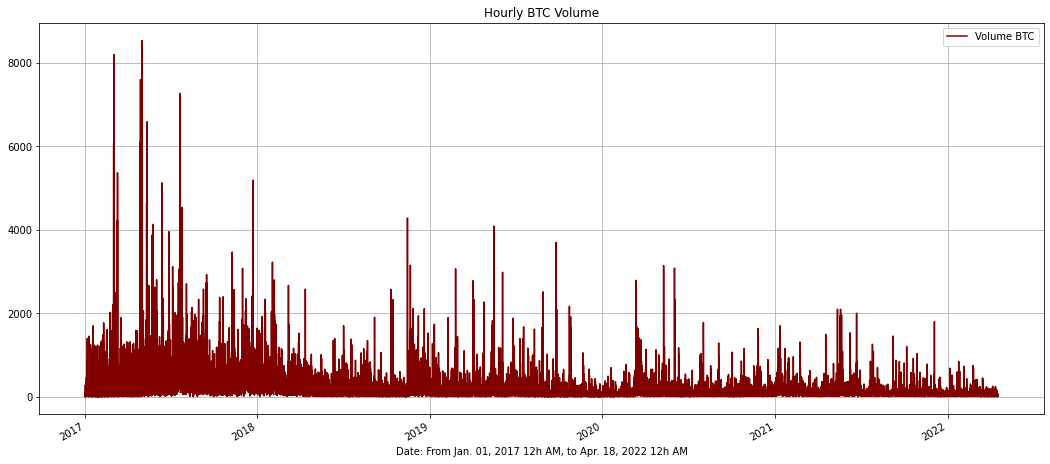

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
data['Volume BTC'].plot(color='maroon',grid = True)
plt.title('Hourly BTC Volume')
plt.xlabel('Date: From Jan. 01, 2017 12h AM, to Apr. 18, 2022 12h AM')
plt.legend()
plt.show()

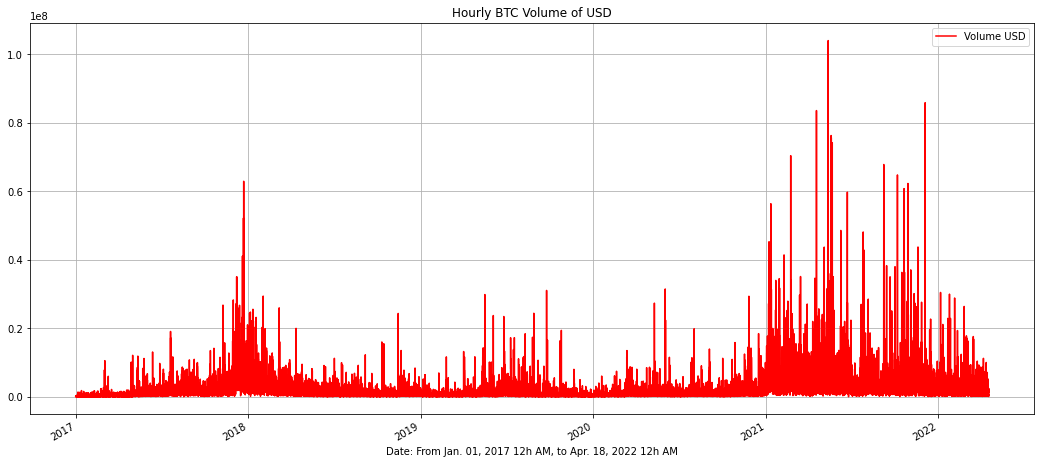

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
data['Volume USD'].plot(color='red',grid = True)
plt.title('Hourly BTC Volume of USD')
plt.xlabel('Date: From Jan. 01, 2017 12h AM, to Apr. 18, 2022 12h AM')
plt.legend()
plt.show()

> We see that the Volume USD at the beginning of the period is absent until the end of 2019 the volume increase due to the crisis of COVID-19.

# Building HMM

The parameters of an HMM are the constant matrix $A$, the observation probability matrix $B$ and the vector $p$, which is summarized in a compact notation: $\lambda =\{N, M, A, B, p\}$

 * ``N``: Number of state.
 * ``M``: Number of different observations that price can make in one given time step in this case we're looking at four different prices (close, open, low, high) that we can observe.
 * ``A``:  Two-dimensional matrix in principle of transition probabilities. The probability of moving from state ``i`` to another state ``j`` every time step the price must move from one state to another even if that transition means staying in place.
 * ``B``: Vector of probabilities of seeing the different observations given that you're in a particular state. Otherwise, B is a varaible that captures the probability of seeing the different prices depending on what state you're in.
 * ``p``: Variable that captures what the probability is starting in a particular state.
 
### Three Key HMM problems

 1) What is the probability that a model generated a sequence of observations? 
 
 $$O=\{ O_1,O_2,\ldots,O_T \}~~~\lambda= (A,B,p) $$
 
 $$P(O\mid\lambda)?$$
 
 2) What sequence of states best explains a sequence of observations?
 
 $$O=\{ O_1,O_2,\ldots,O_T \} ~~~ Q=\{ q_1,q_2,\ldots,q_T \}$$
 
 3) Given a set of observations sequences how do we learn the model probabilities that would generate them? (This is the goal of Baum-Welch Algorithm)
 
 
 $$O=\{ O_1,O_2,\ldots,O_T \} ~~~\lambda= (A,B,p) ?$$
 
<figure>
<center>
<img src='https://www.oreilly.com/library/view/mastering-machine-learning/9781788621113/assets/170c7bd3-8b54-43ab-9336-47d74a57a2a0.png' />
<figcaption>Structure of a generic Hidden Markov Model.</figcaption></center>
</figure>

[Source of figure](https://www.oreilly.com/library/view/mastering-machine-learning/9781788621113/assets/170c7bd3-8b54-43ab-9336-47d74a57a2a0.png)

## Extracting features to be used in the HMM

### Split data

In [ ]:
#TRAIN and TEST SPLIT of Closing prices
#Splitting the dataset into 97% training set and 3% Test set
print(data.shape)
#divide into train and validation set
train = data.iloc[:44998] # or we can use train = data[:int(0.97*(len(data)))] #97%
valid = data.iloc[44998:] # or we can use valid = data[int(0.97*(len(data))):] #3%
print(train.shape,valid.shape)

(46390, 6)
(44998, 6) (1392, 6)


In [ ]:
train

open      high       low     close  Volume BTC  \
date                                                                      
2017-01-01 00:00:00    974.55    974.55    965.34    972.00   10.914243   
2017-01-01 01:00:00    972.00    972.00    970.48    970.55    2.204392   
2017-01-01 02:00:00    970.55    974.50    967.78    969.89   81.681602   
2017-01-01 03:00:00    969.89    972.08    967.78    967.80    2.381414   
2017-01-01 04:00:00    967.80    967.80    967.78    967.80    5.042356   
...                       ...       ...       ...       ...         ...   
2022-02-18 20:00:00  40243.05  40301.74  39808.35  40022.13   53.285830   
2022-02-18 21:00:00  40022.13  40174.82  39915.89  39997.51   36.095774   
2022-02-18 22:00:00  39997.51  40116.75  39768.56  39971.41   42.111346   
2022-02-18 23:00:00  39971.41  40100.28  39900.11  39985.05   36.739292   
2022-02-19 00:00:00  39985.05  40260.32  39957.45  40227.66   36.210574   

                       Volume USD  
date                               
2017-01-01 00:00:00  1.060864e+04  
2017-01-01 01:00:00  2.139473e+03  
2017-01-01 02:00:00  7.922217e+04  
2017-01-01 03:00:00  2.304732e+03  
2017-01-01 04:00:00  4.879992e+03  
...                           ...  
2022-02-18 20:00:00  2.132612e+06  
2022-02-18 21:00:00  1.443741e+06  
2022-02-18 22:00:00  1.683250e+06  
2022-02-18 23:00:00  1.469022e+06  
2022-02-19 00:00:00  1.456667e+06  

[44998 rows x 6 columns]

In [ ]:
valid

open      high       low     close  Volume BTC  \
date                                                                      
2022-02-19 01:00:00  40227.66  40316.52  40100.00  40176.80    7.971673   
2022-02-19 02:00:00  40176.80  40236.08  40027.02  40196.28   21.006714   
2022-02-19 03:00:00  40196.28  40252.81  40097.79  40164.68   17.544887   
2022-02-19 04:00:00  40164.68  40301.59  40083.90  40241.01   20.270911   
2022-02-19 05:00:00  40241.01  40272.81  40185.89  40265.96    3.724931   
...                       ...       ...       ...       ...         ...   
2022-04-17 20:00:00  40378.75  40464.42  40269.08  40272.78   13.717485   
2022-04-17 21:00:00  40272.78  40289.72  40145.42  40214.81    8.438115   
2022-04-17 22:00:00  40214.81  40333.30  39962.41  39996.41   21.986547   
2022-04-17 23:00:00  39996.41  40001.55  39572.66  39694.59   59.810351   
2022-04-18 00:00:00  39694.59  39773.19  39597.36  39738.54   32.482845   

                       Volume USD  
date                               
2022-02-19 01:00:00  3.202763e+05  
2022-02-19 02:00:00  8.443917e+05  
2022-02-19 03:00:00  7.046848e+05  
2022-02-19 04:00:00  8.157219e+05  
2022-02-19 05:00:00  1.499879e+05  
...                           ...  
2022-04-17 20:00:00  5.524413e+05  
2022-04-17 21:00:00  3.393372e+05  
2022-04-17 22:00:00  8.793830e+05  
2022-04-17 23:00:00  2.374147e+06  
2022-04-18 00:00:00  1.290821e+06  

[1392 rows x 6 columns]

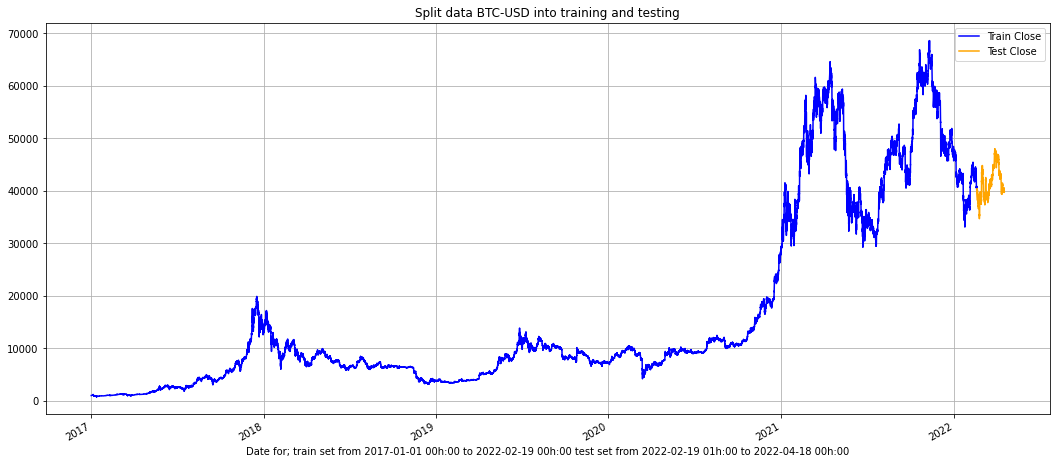

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
train['close'].plot(color='blue',grid = True,label='Train Close')
valid['close'].plot(color='orange',grid = True, label='Test Close')
plt.title('Split data BTC-USD into training and testing')
plt.xlabel('Date for; train set from 2017-01-01 00h:00 to 2022-02-19 00h:00 test set from 2022-02-19 01h:00 to 2022-04-18 00h:00')
plt.legend()
plt.show()

We will extract the features to be used in the HMM, we will start with the sequence of observations; Close, Open, High, and Low prices.

In [ ]:
dataset = data[['close','open','high','low']]
dataset = dataset.to_numpy()

In [ ]:
dataset

array([[  972.  ,   974.55,   974.55,   965.34],
       [  970.55,   972.  ,   972.  ,   970.48],
       [  969.89,   970.55,   974.5 ,   967.78],
       ...,
       [39996.41, 40214.81, 40333.3 , 39962.41],
       [39694.59, 39996.41, 40001.55, 39572.66],
       [39738.54, 39694.59, 39773.19, 39597.36]])

In [ ]:
PLOT_SHOW=True
PLOT_TYPE = False

#Observations for testing kept aside

NUM_TEST = 1392 # 3% of data

#Latency time 

K=50 # For increment of the prediction window, the more you decrease the number the more you obtain a good precision  
NUM_ITERS=10000 # for the criterion to stop the calculation in the HMM model to find the optimal parameters 

labels = ['Close','Open','High','Low']
likelihood_vect = np.empty([0,1]) # Initialization of the likelihood list vector

bic_vect = np.empty([0,1]) # Initialization of the BIC list vector

# Possible number of states in Markov Model
STATE_SPACE = range(2,7)

#Evaluation metric 
# Calculating Mean Absolute Percentage Error (MAPE) of predictions
def calc_mape(predicted_data, true_data):
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])  # MAPE

# Calculation of the Mean Error (ME)
def calc_me(predicted_data, true_data):
     return np.divide(np.sum(predicted_data - true_data,0),true_data.shape[0]) # ME
# Calculation of the Mean Absolute Error (MAE)
def calc_mae(predicted_data, true_data):
     return np.divide(np.sum(np.absolute(predicted_data - true_data), 0), true_data.shape[0])  # MAE
# Calculation of the Mean Percentage Error (MPE)
def calc_mpe(predicted_data, true_data):
     return np.divide(np.sum(np.divide(predicted_data - true_data, true_data), 0), true_data.shape[0])# MPE
# Calculation of the Root Mean Squared Error (RMSE)
def calc_rmse(predicted_data, true_data):
     return np.divide(np.sum(np.divide(np.square(predicted_data - true_data), true_data), 0), true_data.shape[0]) * 0.5# RMSE

### Model Validation

This study uses three regression evaluation metrics to quantify the performance of the proposed algorithm on stock price prediction: Mean Absolute Percentage Error (MAPE), Mean Absolute Error (MAE), Mean Percentage Error (MPE),  Root Mean Square Error (RMSE), and $R^2$ to quantify the model's performance. The following are the formulas for calculating the three metrics:

$$MAPE=$$
$$ME=$$
$$MPE=$$
$$RMSE=\sqrt{\frac{1}{N}\sum_{i=1}^N(CP_i-\widehat{CP})^2}$$
$$MAE = \frac{1}{N}\sum_{i=1}^N|CP_i-\widehat{CP}|$$
$$R^2=1-\frac{\sum_{i=1}^N(CP_i-\widehat{CP})^2}{ \sum_{i=1}^N|CP_i-\overline{CP}|}$$
where $CP_i$ is the closing price's real value, $\widehat{CP}_i$ is the forecasted value, $\overline{CP}$ is the actual value's mean value, and $N$ is the size of validation set. The deviation between the actual and predicted values is measured using RMSE and MAE. The forecasted value is closer to the actual value. The fitting degree of a model is measured by $R^2$, and the closer it is to 1, the better the model fits.

## Model Selection

### Calculation of AIC, BIC, HQC, CAIC


The challenge of selecting a number of hidden states for the HMM is essential. In this section, we examine the performance of HMM with various numbers of states using four typical criteria: the AIC, the BIC, the HQC, and the CAIC. These criteria are appropriate for HMM because the Baum‚ÄìWelch method, or the Expectation Modification (EM) method was utilized to maximize the model's log-likelihood in model training algorithm. To make the model basic and realistic for BTC prediction, we limit the number of states to two to six. The following formulas are used to calculate each of these criteria:

$$AIC= -2\ln(L)+2k,$$
$$BIC= -2\ln(L)+k\ln(M),$$
$$HQC= -2\ln(L)+k\ln(\ln(M)),$$
$$CAIC=-2\ln(L)+k(\ln(M)+1),$$


where $L$ is the likelihood function for the model, $M$ is the number of observation points, and $k$ is the number of estimated parameters in the model.

**Note**: we assume that the distribution corresponding with each hidden state is a Gaussian distribution; therefore, the number of parameters, $k$, is formulated as $k = N^2+2N‚àí1$, where $N$ is numbers of states used in the HMM.

In [ ]:
#BIC criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

predicted_stock_data = np.empty([0,dataset.shape[1]])
likelihood_vect = np.empty([0,1])
bic_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula 'ùëÅ^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        likelihood_vect = np.vstack((likelihood_vect, model.score(dataset)))
#  Computing the BIC as the criteria for model selection
        bic_vect = np.vstack((bic_vect, -2 * model.score(dataset) +  num_params * np.log(dataset.shape[0])))
    #selection_array[i-1,:] = np.transpose(bic_vect)
    print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(bic_vect) + 2

#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


**Note**: that the BIC criterion algorithm takes a few minutes to find the states of each observation.

In [ ]:
result_b = np.transpose(bic_vect)
result_bic = result_b.reshape(5,120)
result_bic = {'2_states':result_bic[0,:],
        '3_states':result_bic[1,:],
        '4_states':result_bic[2,:],
        '5_states':result_bic[3,:],
        '6_states':result_bic[4,:]}
result_bic = pd.DataFrame(result_bic)



In [ ]:
bic_vect

array([[8.17234932e+09],
       [8.16377122e+09],
       [8.16269836e+09],
       [8.15968219e+09],
       [8.15931041e+09],
       [8.14939990e+09],
       [8.14609658e+09],
       [8.14272776e+09],
       [8.13902676e+09],
       [8.13361177e+09],
       [8.12521185e+09],
       [7.92350062e+09],
       [7.88443218e+09],
       [7.87058929e+09],
       [7.85959319e+09],
       [7.85266666e+09],
       [7.83878437e+09],
       [7.82308522e+09],
       [7.81745824e+09],
       [7.81248355e+09],
       [7.81611219e+09],
       [7.81245330e+09],
       [7.80437657e+09],
       [7.80108013e+09],
       [7.80020317e+09],
       [7.79893868e+09],
       [7.79233035e+09],
       [7.78413513e+09],
       [7.77861562e+09],
       [7.77428006e+09],
       [7.77101769e+09],
       [7.76604854e+09],
       [7.75826692e+09],
       [7.75245268e+09],
       [7.74929533e+09],
       [7.74628375e+09],
       [7.74191565e+09],
       [7.73794620e+09],
       [7.72525771e+09],
       [7.72481245e+09],


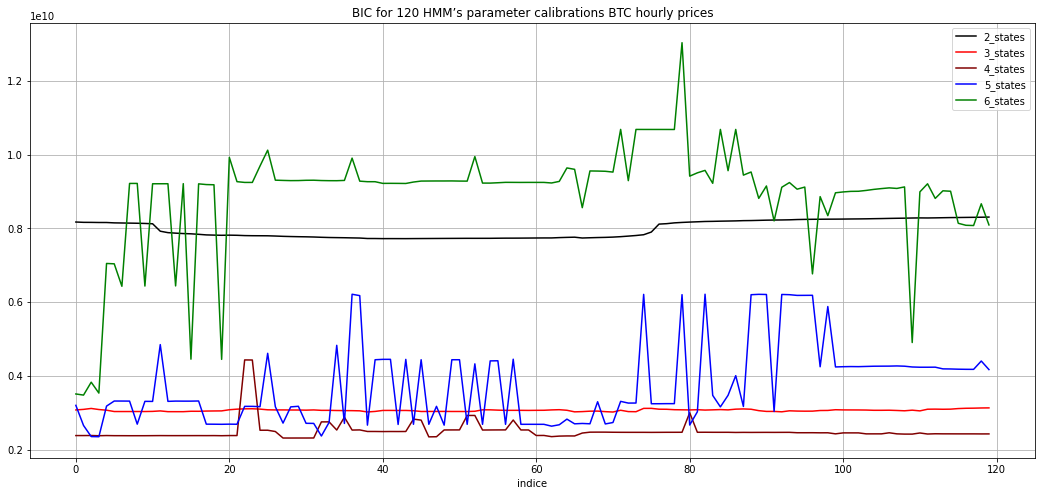

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_bic['2_states'].plot(color='black',grid = True)
result_bic['3_states'].plot(color='red',grid = True)
result_bic['4_states'].plot(color='maroon',grid = True)
result_bic['5_states'].plot(color='blue',grid = True)
result_bic['6_states'].plot(color='green',grid = True)
plt.title('BIC for 120 HMM‚Äôs parameter calibrations BTC hourly prices')
plt.xlabel('indice')
plt.legend()
plt.show()

> We show that the four-state HMM is the best model among the two to six state HMMs!

In [ ]:
#AIC criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

aic_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula 'ùëÅ^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        #likelihood_vect = np.vstack((likelihood_vect, model.score(data_selection)))
#  Computing the BIC as the criteria for model selection
        aic_vect = np.vstack((aic_vect, -2 * model.score( dataset) +  2 * num_params)) 
    #selection_array[i-1,:] = np.transpose(bic_vect)
    print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(aic_vect) + 2

#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


In [ ]:
result = np.transpose(aic_vect)
result_aic = result.reshape(5,120)
result_aic = {'2_states':result_aic[0,:],
        '3_states':result_aic[1,:],
        '4_states':result_aic[2,:],
        '5_states':result_aic[3,:],
        '6_states':result_aic[4,:]}
result_aic = pd.DataFrame(result_aic)

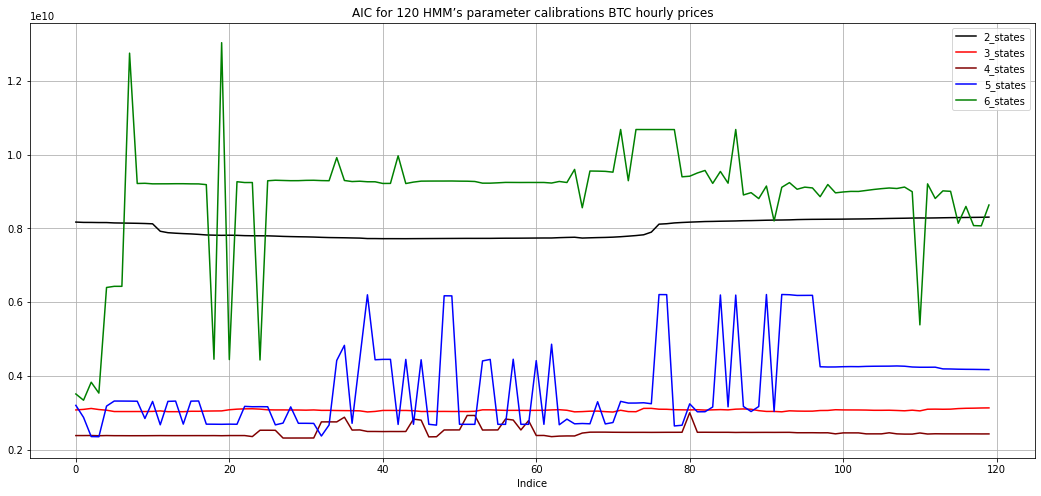

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_aic['2_states'].plot(color='black',grid = True)
result_aic['3_states'].plot(color='red',grid = True)
result_aic['4_states'].plot(color='maroon',grid = True)
result_aic['5_states'].plot(color='blue',grid = True)
result_aic['6_states'].plot(color='green',grid = True)
plt.title('AIC for 120 HMM‚Äôs parameter calibrations BTC hourly prices')
plt.xlabel('Indice')
plt.legend()
plt.show()

In [ ]:
#hqc criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

#predicted_stock_data = np.empty([0,dataset.shape[1]])
#likelihood_vect = np.empty([0,1])
hqc_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula 'ùëÅ^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        hqc_vect = np.vstack((hqc_vect, -2 * model.score( dataset) + np.log(np.log(dataset.shape[0])) * num_params))
       # likelihood_vect = np.vstack((likelihood_vect, model.score(dataset)))
#  Computing the BIC as the criteria for model selection
       #aic_vect = np.vstack((aic_vect, -2 * model.score( dataset) +  2 * num_params)) 
        #hqc_vect = np.vstack(hqc_vect, -2 * model.score(dataset) +  num_params * (np.log(np.log(dataset.shape[0]))))
    #selection_array[i-1,:] = np.transpose(bic_vect)
   # print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(bic_vect) + 2
#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


In [ ]:
result_h = np.transpose(hqc_vect)
result_qhc = result_h.reshape(5,120)
result_qhc = {'2_states':result_qhc[0,:],
        '3_states':result_qhc[1,:],
        '4_states':result_qhc[2,:],
        '5_states':result_qhc[3,:],
        '6_states':result_qhc[4,:]}
result_qhc = pd.DataFrame(result_qhc)

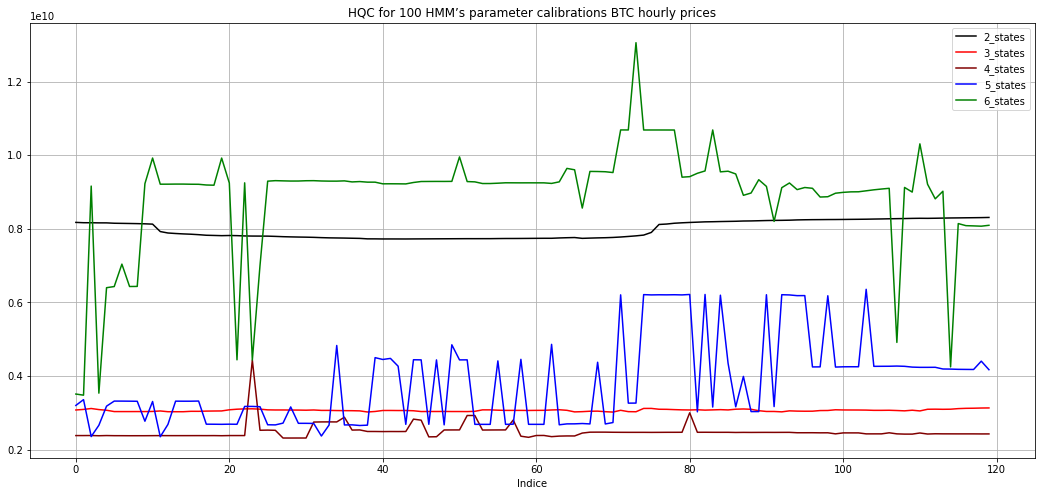

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_qhc['2_states'].plot(color='black',grid = True)
result_qhc['3_states'].plot(color='red',grid = True)
result_qhc['4_states'].plot(color='maroon',grid = True)
result_qhc['5_states'].plot(color='blue',grid = True)
result_qhc['6_states'].plot(color='green',grid = True)
plt.title('HQC for 100 HMM‚Äôs parameter calibrations BTC hourly prices')
plt.xlabel('Indice')
plt.legend()
plt.show()

In [ ]:
#caic criteria
warnings.filterwarnings("ignore", category=DeprecationWarning)

#predicted_stock_data = np.empty([0,dataset.shape[1]])
#likelihood_vect = np.empty([0,1])
caic_vect = np.empty([0,1]) 

iter = 120
for states in STATE_SPACE: 
    for i in range(0,iter):
#Computing the number of parameters that will be fed in the GaussianHMM Model by using the formula 'ùëÅ^2+2N-1'
        print('The i {}'.format(i))
        num_params = states**2 + 2*states-1
        model = hmm.GaussianHMM(n_components=states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS)
        indice = NUM_TEST+i
        data_selection = dataset[indice:indice+1000,:]
        model.fit(data_selection)
        #likelihood_vect = np.vstack((likelihood_vect, model.score(dataset)))
        #  Computing the BIC as the criteria for model selection
        caic_vect = np.vstack((caic_vect, -2 * model.score(dataset) + (np.log(dataset.shape[0]) + 1) * num_params)) 
    #selection_array[i-1,:] = np.transpose(bic_vect)
    print(' number of states  {}'.format(states))
# Formula for computing the optimal number of states

#opt_states = np.argmin(bic_vect) + 2

#print('The Optimum number of states to be considered are {}'.format(opt_states))

The i 0
The i 1
The i 2
The i 3
The i 4
The i 5
The i 6
The i 7
The i 8
The i 9
The i 10
The i 11
The i 12
The i 13
The i 14
The i 15
The i 16
The i 17
The i 18
The i 19
The i 20
The i 21
The i 22
The i 23
The i 24
The i 25
The i 26
The i 27
The i 28
The i 29
The i 30
The i 31
The i 32
The i 33
The i 34
The i 35
The i 36
The i 37
The i 38
The i 39
The i 40
The i 41
The i 42
The i 43
The i 44
The i 45
The i 46
The i 47
The i 48
The i 49
The i 50
The i 51
The i 52
The i 53
The i 54
The i 55
The i 56
The i 57
The i 58
The i 59
The i 60
The i 61
The i 62
The i 63
The i 64
The i 65
The i 66
The i 67
The i 68
The i 69
The i 70
The i 71
The i 72
The i 73
The i 74
The i 75
The i 76
The i 77
The i 78
The i 79
The i 80
The i 81
The i 82
The i 83
The i 84
The i 85
The i 86
The i 87
The i 88
The i 89
The i 90
The i 91
The i 92
The i 93
The i 94
The i 95
The i 96
The i 97
The i 98
The i 99
The i 100
The i 101
The i 102
The i 103
The i 104
The i 105
The i 106
The i 107
The i 108
The i 109
The i 110


In [ ]:
result_c = np.transpose(caic_vect)
result_caic = result_c.reshape(5,120)
result_caic = {'2_states':result_caic[0,:],
        '3_states':result_caic[1,:],
        '4_states':result_caic[2,:],
        '5_states':result_caic[3,:],
        '6_states':result_caic[4,:]}
result_caic = pd.DataFrame(result_caic)

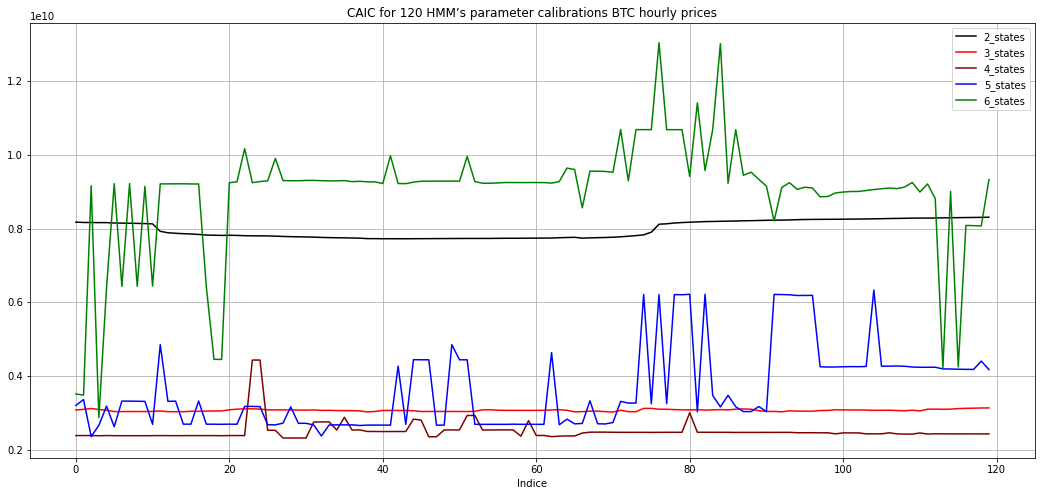

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) # Increases the Plot Size
result_caic['2_states'].plot(color='black',grid = True)
result_caic['3_states'].plot(color='red',grid = True)
result_caic['4_states'].plot(color='maroon',grid = True)
result_caic['5_states'].plot(color='blue',grid = True)
result_caic['6_states'].plot(color='green',grid = True)
plt.title('CAIC for 120 HMM‚Äôs parameter calibrations BTC hourly prices')
plt.xlabel('Indice')
plt.legend()
plt.show()

## Graphs showing how HMM has been used to estimate the first 1392 values of the data through forecasting the close, Low, High and Open prices.

The idx 1391
The idx 1390
The idx 1389
The idx 1388
The idx 1387
The idx 1386
The idx 1385
The idx 1384
The idx 1383
The idx 1382
The idx 1381
The idx 1380
The idx 1379
The idx 1378
The idx 1377
The idx 1376
The idx 1375
The idx 1374
The idx 1373
The idx 1372
The idx 1371
The idx 1370
The idx 1369
The idx 1368
The idx 1367
The idx 1366
The idx 1365
The idx 1364
The idx 1363
The idx 1362
The idx 1361
The idx 1360
The idx 1359
The idx 1358
The idx 1357
The idx 1356
The idx 1355
The idx 1354
The idx 1353
The idx 1352
The idx 1351
The idx 1350
The idx 1349
The idx 1348
The idx 1347
The idx 1346
The idx 1345
The idx 1344
The idx 1343
The idx 1342
The idx 1341
The idx 1340
The idx 1339
The idx 1338
The idx 1337
The idx 1336
The idx 1335
The idx 1334
The idx 1333
The idx 1332
The idx 1331
The idx 1330
The idx 1329
The idx 1328
The idx 1327
The idx 1326
The idx 1325
The idx 1324
The idx 1323
The idx 1322
The idx 1321
The idx 1320
The idx 1319
The idx 1318
The idx 1317
The idx 1316
The idx 1315

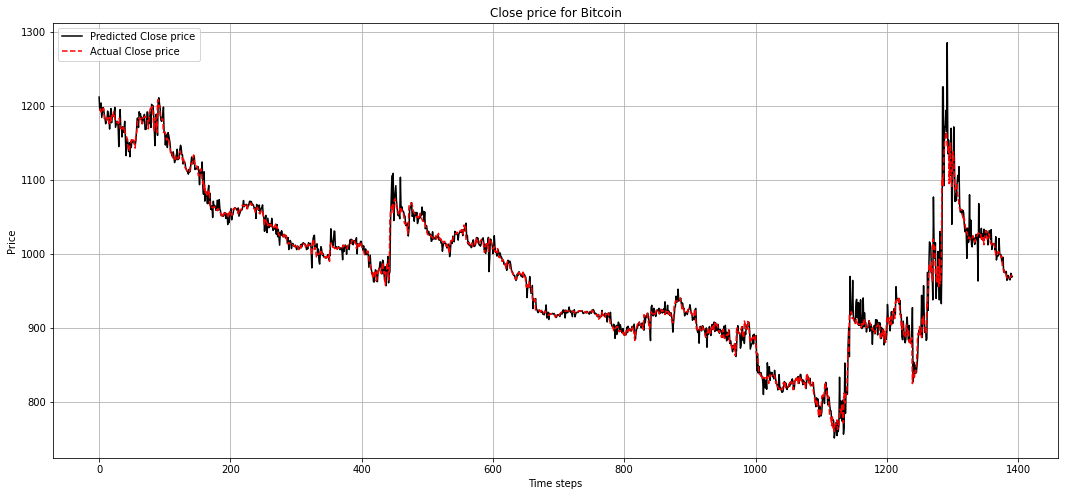

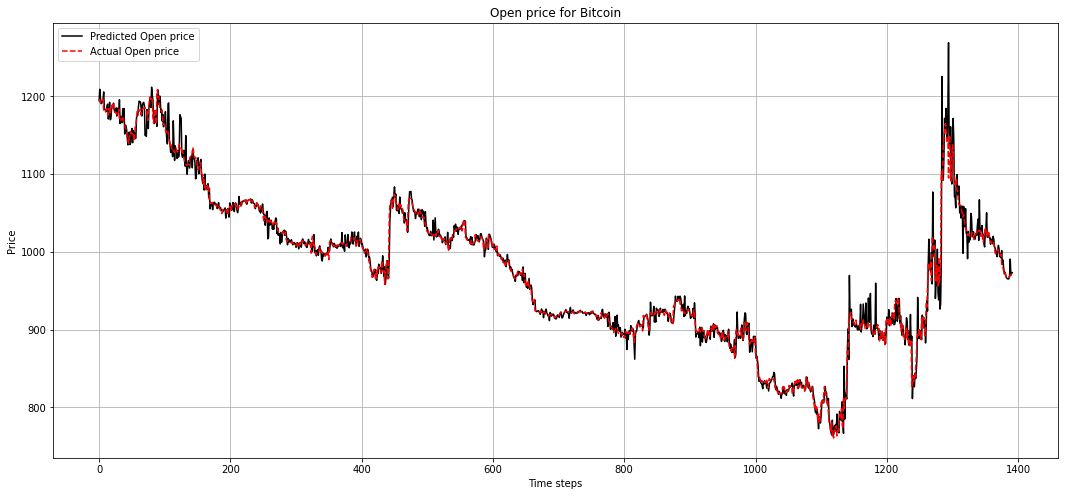

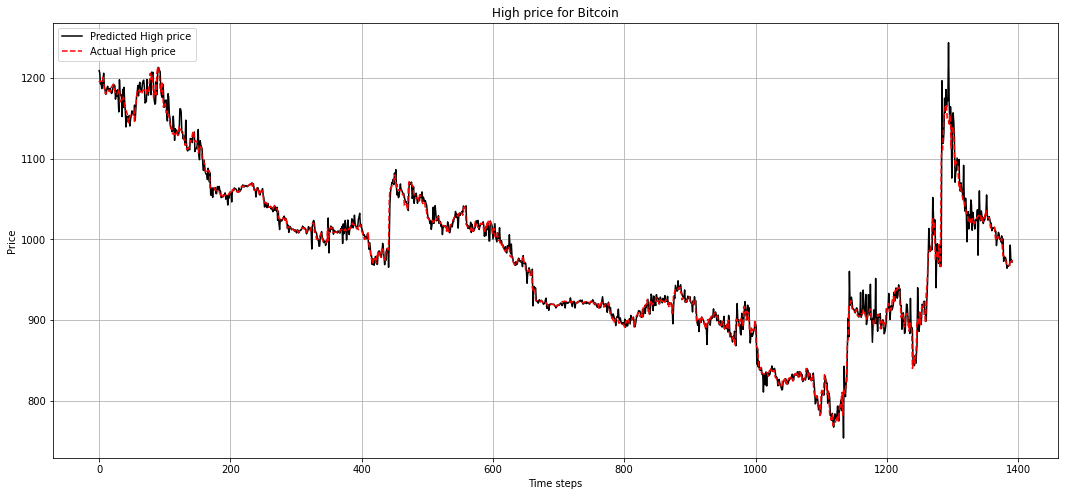

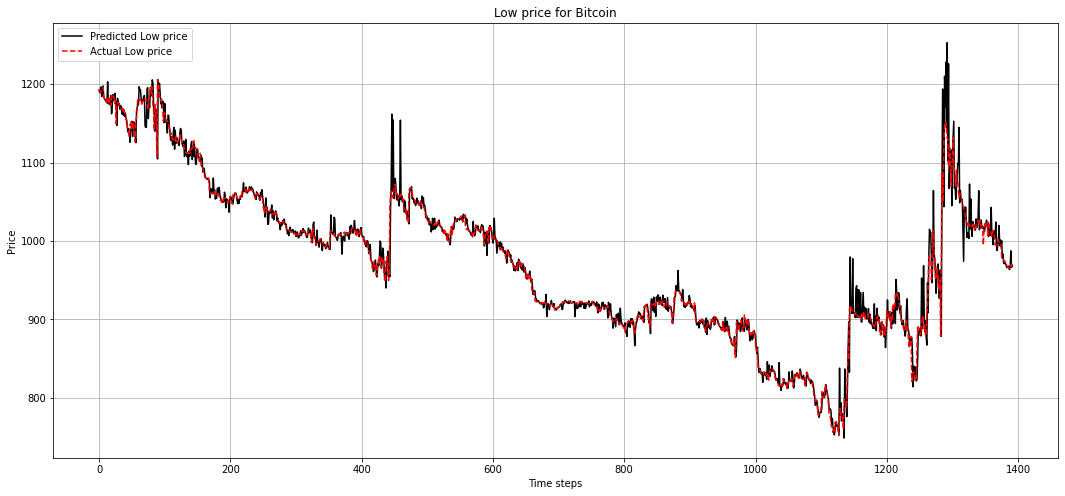

In [ ]:
opt_states = 4 # Optimal state
mape_computed=[]
mae_computed=[]
me_computed=[]
mpe_computed=[]
rmse_computed=[]
for idx in reversed(range(NUM_TEST)):
    print('The idx {}'.format(idx))
    train_dataset = dataset[idx + 1:,:]
    test_data = dataset[idx,:]
    num_examples = train_dataset.shape[0]

    #model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', startprob_prior=dirichlet_params, transmat_prior=dirichlet_params, tol=0.0001, n_iter=NUM_ITERS, init_params='mc')


    if idx == NUM_TEST - 1:
        # build a HMM instance with a initial parameters
        model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='stmc')
    else:

    # Retuning the model by using the HMM paramters from the previous iterations as the prior
        # build a HMM instance
        model = hmm.GaussianHMM(n_components=opt_states, covariance_type='full', tol=0.0001, n_iter=NUM_ITERS, init_params='')
        model.transmat_ = transmat_retune_prior  # initial transition matrix
        model.startprob_ = startprob_retune_prior # initial destrebution prbability
        model.means_ = means_retune_prior  # initial nean value
        model.covars_ = covars_retune_prior # initial covars matrix
    #Training HMM parameters 
    model.fit(np.flipud(train_dataset))

#  transmat_ (array, shape (n_components, n_components)) ‚Äì Matrix of transition probabilities between states.
   
    transmat_retune_prior = model.transmat_   # save the model transmat for next iteration

#  startprob_ (array, shape (n_components, )) ‚Äì Initial state occupation distribution.
    
    startprob_retune_prior = model.startprob_ # save the star probability for next iteration
    means_retune_prior = model.means_ # save the mean value for next iteration
    covars_retune_prior = model.covars_ # save the covars matrix for next iteration

    if model.monitor_.iter == NUM_ITERS: # check the sufficient number of iterations
        print('Increase number of iterations')
        sys.exit(1)

    iters = 1 # start iteration
    past_likelihood = [] # create a list for past likelihood values

    curr_likelihood = model.score(np.flipud(train_dataset[0:K - 1, :])) #calculate the current likelihood value of initial data window

    while iters < num_examples / K - 1:# calculate the likelihood for all data window
        past_likelihood = np.append(past_likelihood, model.score(np.flipud(train_dataset[iters:iters + K - 1, :])))
        iters = iters + 1 # next iteration
    likelihood_diff_idx = np.argmin(np.absolute(past_likelihood - curr_likelihood)) # loking for teh argument of past likelihood instate of the current likelihood
     # formula for the estimation value(article, page 7, formula (6))
    predicted_change = train_dataset[likelihood_diff_idx,:] - train_dataset[likelihood_diff_idx + 1,:]
    predicted_stock_data = np.vstack((predicted_stock_data, dataset[idx + 1,:] + predicted_change))

mape = calc_mape(predicted_stock_data, np.flipud(dataset[range(1392),:]))
mape_computed.append(mape)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(mape))

mae = calc_mape(predicted_stock_data, np.flipud(dataset[range(1392),:]))
mae_computed.append(mae)
print('MAE for close, open, high and Low bitcoin prices are as follows : {} '.format(mae))

me = calc_me(predicted_stock_data, np.flipud(dataset[range(1392),:]))
me_computed.append(me)
print('ME for close, open, high and Low bitcoin prices are as follows : {} '.format(me))

mpe = calc_mpe(predicted_stock_data, np.flipud(dataset[range(1392),:]))
mpe_computed.append(mpe)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(mpe))

rmse = calc_rmse(predicted_stock_data, np.flipud(dataset[range(1392),:]))
rmse_computed.append(rmse)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(rmse))


if PLOT_TYPE:
    hdl_p = plt.plot(range(1392), predicted_stock_data);
    plt.title('Predicted bitcoin prices')
    plt.legend(iter(hdl_p), ('Close','Open','High','Low'))
    plt.xlabel('Time steps')
    plt.ylabel('Price')
    plt.figure()
    hdl_a = plt.plot(range(1392),np.flipud(dataset[range(1392),:]))
    plt.title('Actual bitcoin prices')
    plt.legend(iter(hdl_p), ('Close','Open','High','Low'))
    plt.xlabel('Time steps')
    plt.ylabel('Price')
else:
    for i in range(4):
        plt.figure()
        plt.plot(range(1392), predicted_stock_data[:,i],'k-', label = 'Predicted '+labels[i]+' price');
        plt.plot(range(1392),np.flipud(dataset[range(1392),i]),'r--', label = 'Actual '+labels[i]+' price')
        plt.xlabel('Time steps')
        plt.ylabel('Price')
        plt.title(labels[i]+' price'+ ' for '+"Bitcoin")
        plt.grid(True)
        plt.legend(loc = 'upper left')        
if PLOT_SHOW:
    plt.show(block=False)

In [ ]:
mae_computed=[]
me_computed=[]
mpe_computed=[]
rmse_computed=[]
mae = calc_mae(predicted_stock_data, np.flipud(dataset[range(1392),:]))
mae_computed.append(mae)
print('MAE for close, open, high and Low bitcoin prices are as follows : {} '.format(mae))

MAE for close, open, high and Low bitcoin prices are as follows : [7.43816451 7.11206178 6.09886135 7.78859914] 


In [ ]:
me = calc_me(predicted_stock_data, np.flipud(dataset[range(1392),:]))
me_computed.append(me)
print('ME for close, open, high and Low bitcoin prices are as follows : {} '.format(me))

ME for close, open, high and Low bitcoin prices are as follows : [0.77375359 0.42813218 0.37613147 1.2133046 ] 


In [ ]:
mpe = calc_mpe(predicted_stock_data, np.flipud(dataset[range(1392),:]))
mpe_computed.append(mpe)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(mpe))

MAPE for close, open, high and Low bitcoin prices are as follows : [0.00081358 0.00044205 0.00037333 0.00128528] 


In [ ]:
rmse = calc_rmse(predicted_stock_data, np.flipud(dataset[range(1392),:]))
rmse_computed.append(rmse)
print('MAPE for close, open, high and Low bitcoin prices are as follows : {} '.format(rmse))

MAPE for close, open, high and Low bitcoin prices are as follows : [0.09779549 0.08307568 0.05581774 0.11908779] 


# Conclusion

In our study, we studied the cryptocurrency of  BTC hourly time series. The purpose of this study was to model, calibrate and predict the series. The modeling consisted in finding models that will estimate them with the minimum error. We used the HMM model, as for the three algorithms: Forward, backward, and Baum-Welch, they were chosen selectively from the observation of block from data. We tested a number of models, then selected those that provided a lower criterion value is better in each of these four criteria (AIC, BIC, HQC, CAIC). Then we calibrated the selected models by the likelihood method, i.e. we estimated the parameters of the HMM model. After modeling and calibration we predicted the next 1392 values of the series closing price. Generally the prediction does not contradict the structure of the series. However we are conscious that the models are not unique, and that it is possible to find other models with better estimation performances. These models can be found by differentiating the series in different ways. All the difficulty of the time series is in the modeling using HMM, and with a more thorough study and with advanced technical and theoretical means, it is possible to ‚Äúfind‚Äù the best model for the series.
Finally, because the forecast is not given an explicit number of prediction points, HMM models may be more difficult to execute than Deep learning time series models (like LSTM). However, you should design your model to forecast the required number of periods. If you wish to forecast more, you'll need to expand your prediction set to include more columns (Open, High, Low) with expected values for previous periods. The HMM has a relatively good performance! In the end, the model provided us with more appropriate performance metrics.


# References

* [FISH 507 - lecture 12 - Hidden Markov Models](https://youtu.be/MHJFNeK-rug)
* [Derivation and implementation of Baum Welch Algorithm for Hidden Markov Model](http://www.adeveloperdiary.com/data-science/machine-learning/derivation-and-implementation-of-baum-welch-algorithm-for-hidden-markov-model/)
* [Simple Implementation of the Viterbi Algorithm for training Hidden Markov Models.](https://github.com/luisguiserrano/hmm)
* [A friendly introduction to Bayes Theorem and Hidden Markov Models](https://youtu.be/kqSzLo9fenk)
* [Stock Price Prediction Using Hidden Markov Model](https://rubikscode.net/2021/09/06/stock-price-prediction-using-hidden-markov-model/)
* [HMM Weather Example](https://rpubs.com/mingo1226/hmm)
* [Stock prediction using a Hidden Markov Model versus a Long Short-Term Memory](https://fse.studenttheses.ub.rug.nl/20683/1/AI_BA_2019_Bram.pdf)
* [Research on HMM-Based Efficient Stock Price Prediction](https://www.hindawi.com/journals/misy/2022/8124149/)
* [Bitcoin Historical Dataset](https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd)
* [Avik Das: Dynamics Programming for Machine Learning- Hidden Markov Models | PyData LA 2019](https://youtu.be/MADX-L75ub8)
* [Baum-Welch algorithm for training a Hidden Markov Model ‚Äî Part 2 of the HMM series](https://medium.com/analytics-vidhya/baum-welch-algorithm-for-training-a-hidden-markov-model-part-2-of-the-hmm-series-d0e393b4fb86)
* [Package HMMlearing ](https://hmmlearn.readthedocs.io/en/latest/tutorial.html#available-models)
* []()
